<a href="https://colab.research.google.com/github/iIsunnyIi/Biomedical_Signal_Processing/blob/main/BSP_Asgm_2_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Given an ECG signal “original_ECG.mat”, compute its DFT. (Sampling frequency
of the signal is 1000 Hz.)**

In [ ]:
import scipy.io
mat = scipy.io.loadmat('/content/original_ECG.mat')

In [ ]:
mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 13 11:22:04 2015',
 '__version__': '1.0',
 'original': array([[39.60475775, 40.07076881, 40.5922544 , ..., 54.22427311,
         58.8477386 , 62.91896577]])}

In [ ]:
import numpy as np

ecg=mat['original']
np.shape(ecg)

(1, 10000)

**(a) Plot its magnitude and phase spectrum.**

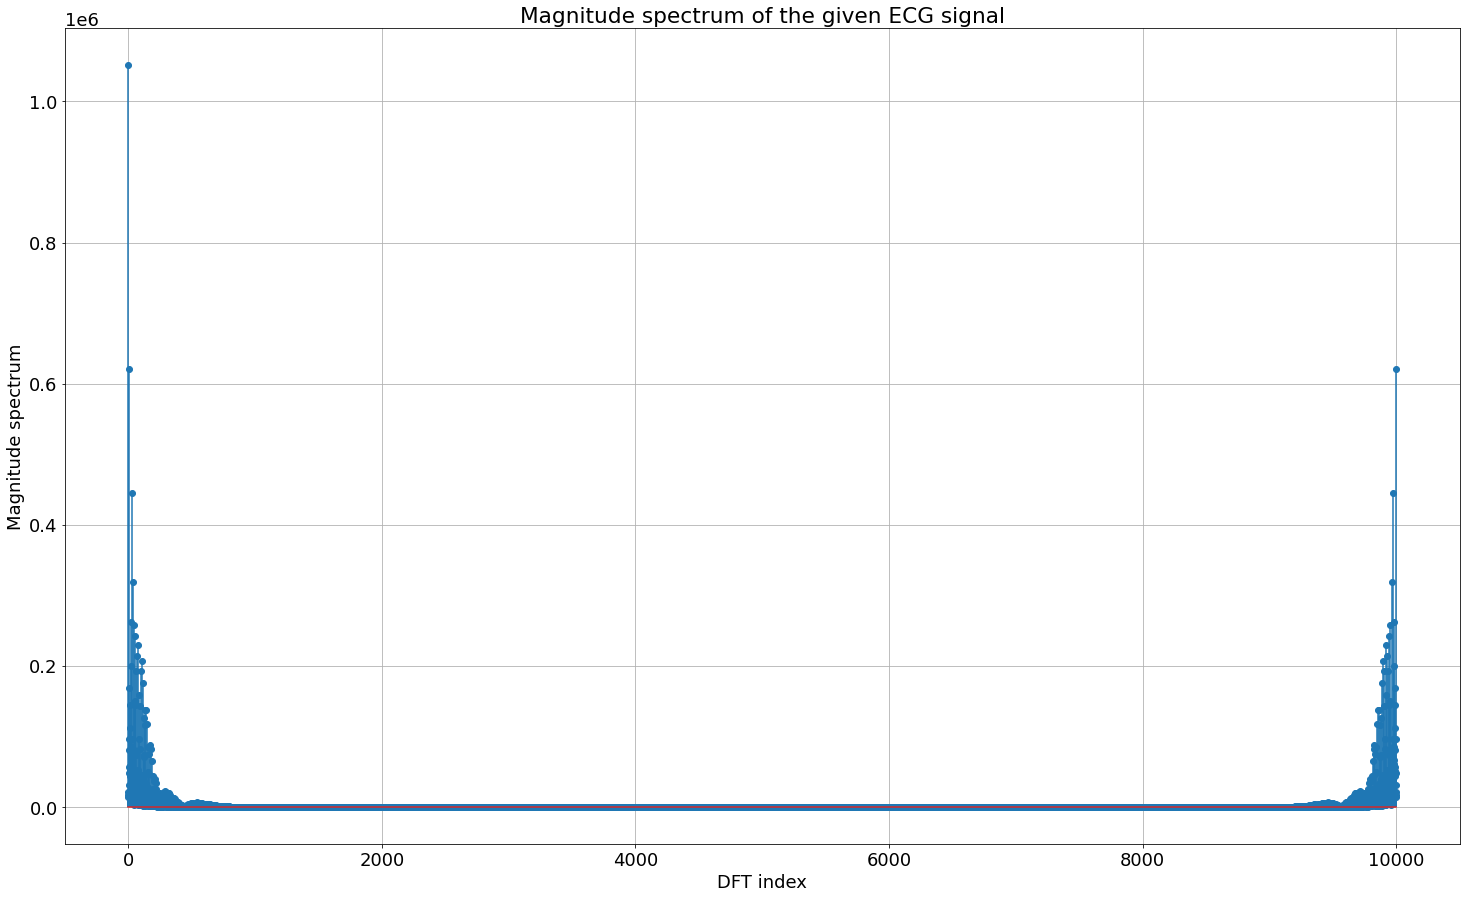

In [ ]:
import matplotlib.pyplot as plt

N=np.shape(ecg)[1]
ecg_dft=np.fft.fft(ecg,N)
k=np.reshape(np.arange(0,N,1),(1,N))

plt.rcParams.update({'font.size':18})
plt.figure(figsize=(25,15))
plt.stem(k[0],abs(ecg_dft[0]),use_line_collection=True)
plt.xlabel('DFT index')
plt.ylabel('Magnitude spectrum')
plt.title(f'Magnitude spectrum of the given ECG signal')
plt.grid()
plt.show()

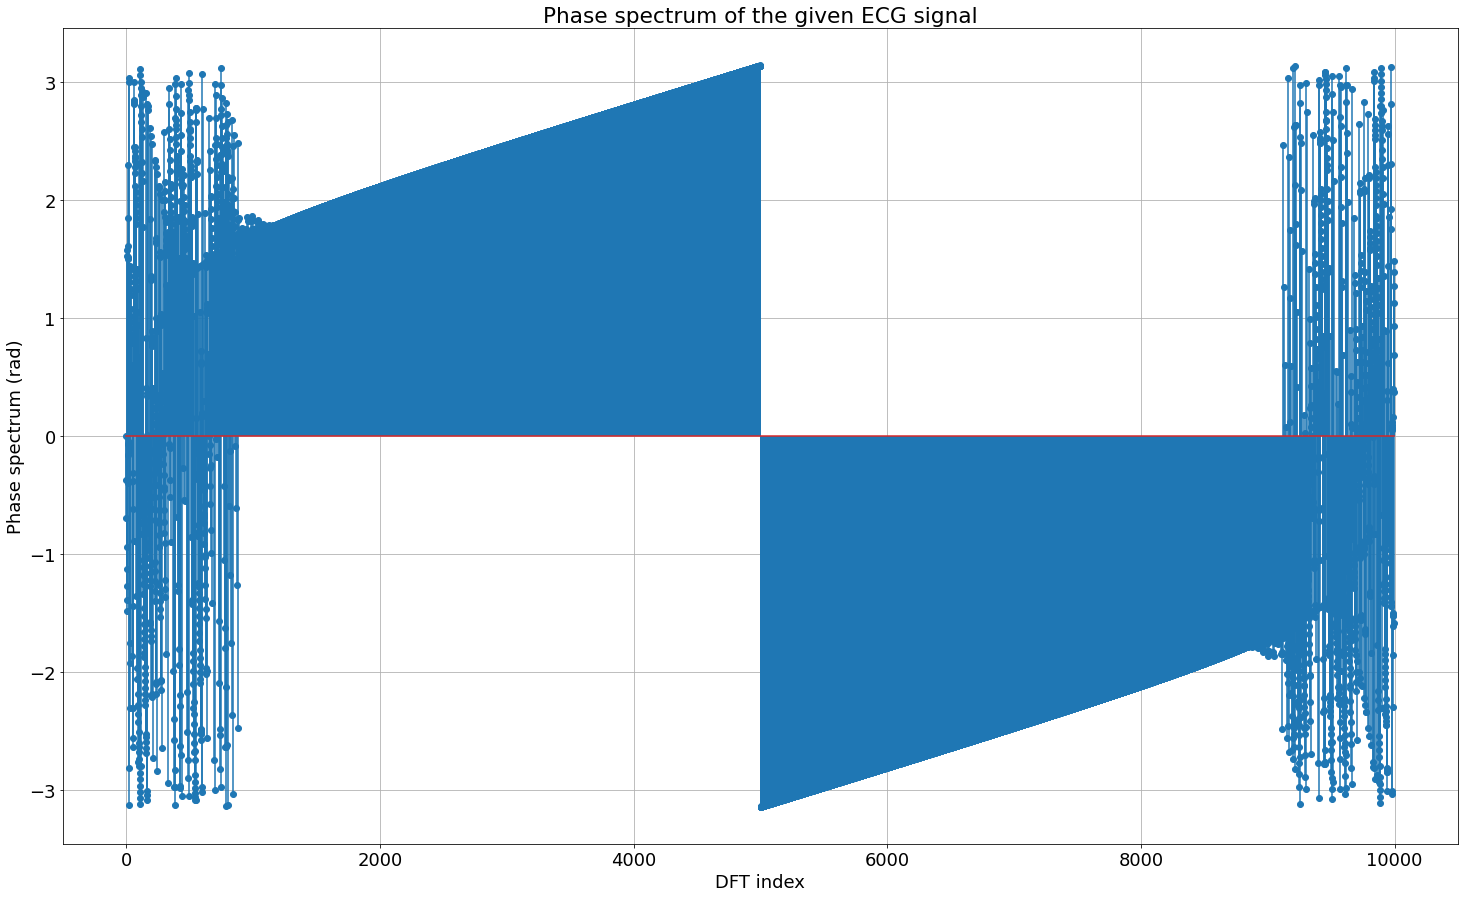

In [ ]:
import cmath

ph=[]
for i in range(N):
  ph.append(cmath.phase(ecg_dft[0][i]))

plt.rcParams.update({'font.size':18})
plt.figure(figsize=(25,15))
plt.stem(k[0],ph,use_line_collection=True)
plt.xlabel('DFT index')
plt.ylabel('Phase spectrum (rad)')
plt.title(f'Phase spectrum of the given ECG signal')
plt.grid()
plt.show()

**b) Find out the magnitude in dB and phase angle in degrees at frequency 30 Hz.
Display the values.**

Magnitude at 30 Hz = 68.03065143452046 dB 
Phase at 30 Hz = -0.7299619140957124 degree 


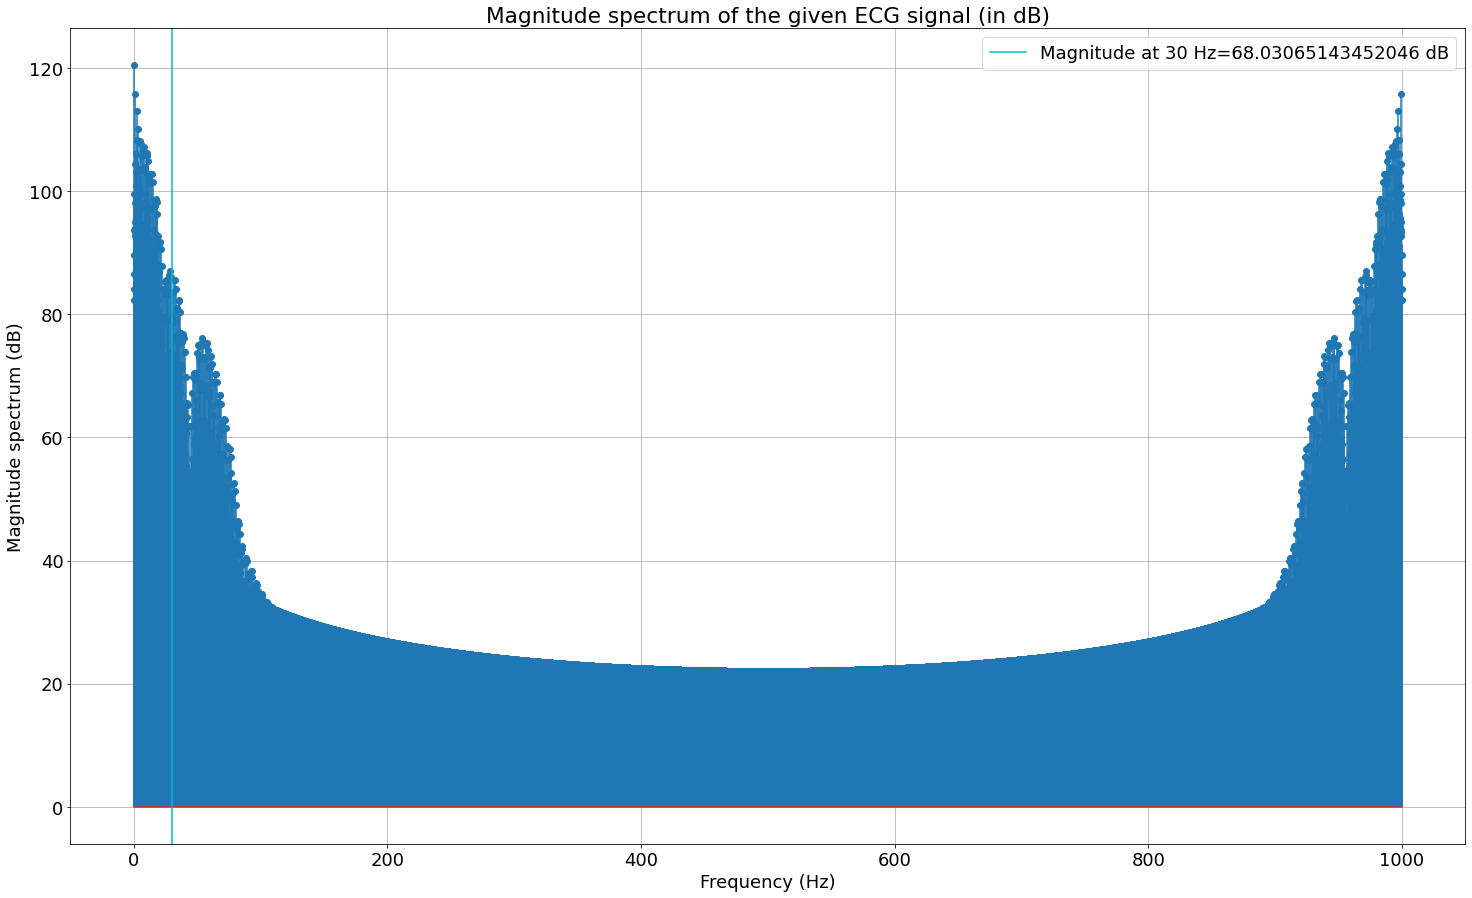

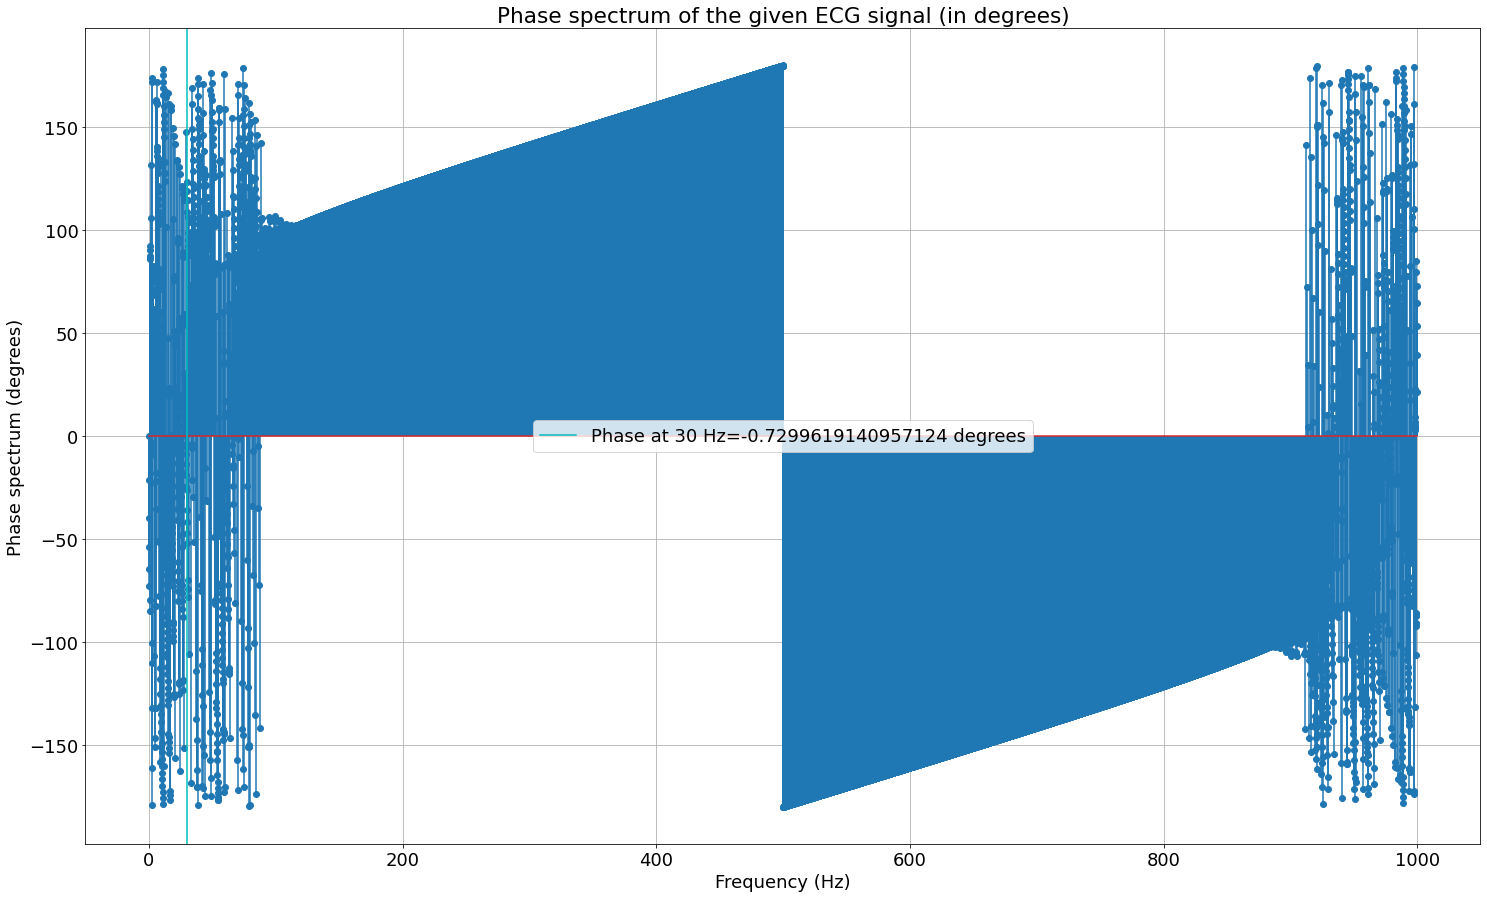

In [ ]:
fs=1000
f=(k*fs)/N

db=20*np.log10(abs(ecg_dft[0]))
freq=30
ind=(freq*N)/fs
mag30=db[int(ind)]
ph30=ph[int(ind)]

print(f'Magnitude at 30 Hz = {mag30} dB ')
print(f'Phase at 30 Hz = {ph30} degree ')

plt.rcParams.update({'font.size':18})
plt.figure(figsize=(25,15))
plt.stem(f[0],db,use_line_collection=True)
plt.axvline(x=freq,ymin=0,ymax=mag30,color='c',label=f'Magnitude at 30 Hz={mag30} dB')  
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude spectrum (dB)')
plt.title(f'Magnitude spectrum of the given ECG signal (in dB)')
plt.legend()
plt.grid()
plt.show()

plt.rcParams.update({'font.size':18})
plt.figure(figsize=(25,15))
plt.stem(f[0],np.array(ph)*(180/np.pi),use_line_collection=True)
plt.axvline(x=freq,ymin=0,ymax=mag30,color='c',label=f'Phase at 30 Hz={ph30} degrees')  
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase spectrum (degrees)')
plt.title(f'Phase spectrum of the given ECG signal (in degrees)')
plt.legend()
plt.grid()
plt.show()

**2. The original speech signal is given as “science.wav”. The sampling rate is 32 Khz.**

In [ ]:
!pip install wavio
import numpy as np
import wavio

In [ ]:
aud=wavio.read('/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science.wav').data
np.shape(aud)

(90267, 1)

**(a) Add 10 dB, 0 dB and -10 dB Gaussian noise to it. Plot the signals**

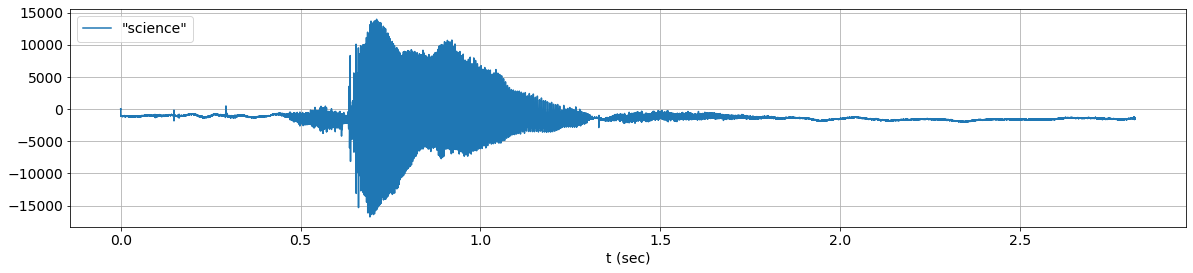

Utterance of the word : "science"


In [ ]:
import matplotlib.pyplot as plt
import numpy

fs=32000
N=np.shape(aud)[0]
duration=N/fs

t=np.linspace(0,duration,N)

plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,aud, label='"science"')
plt.xlabel('t (sec)')
plt.grid()
plt.legend(loc='upper left')
plt.show()

import IPython.display as ipd

print('Utterance of the word : "science"')
ipd.Audio('/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science.wav') # load a local WAV file

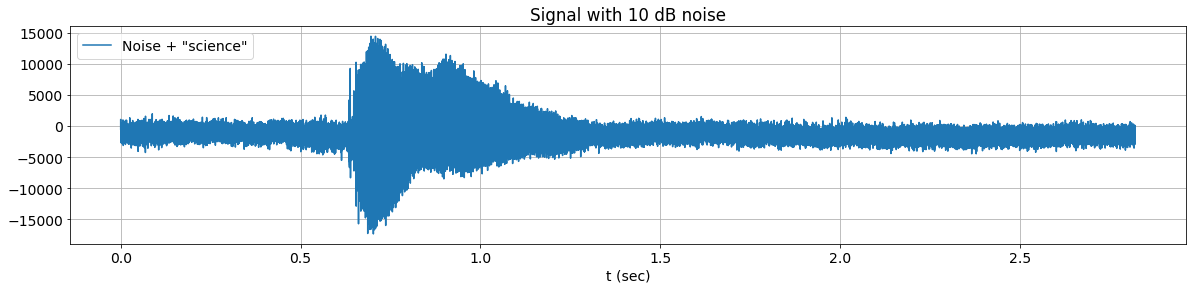

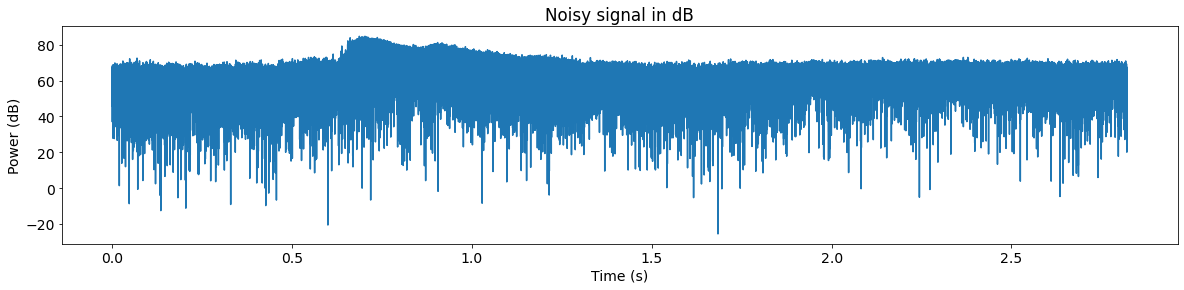

noisy sound


In [ ]:
# ADDING 10 dB NOISE: 

snr_db = 10
sig_pwr=np.array(aud,dtype='int64')**2
sig_avg_watts=np.mean(sig_pwr)   # calculate signal power 


sig_avg_db = 10 * np.log10(sig_avg_watts)   # signal power to dB

noise_avg_db = sig_avg_db - snr_db     # SNR =  signal dB -  noise dB
noise_avg_watts = 10 ** (noise_avg_db / 10)   # calculate average noise energy = noise variance

# defining the noise signal
mean_noise = 0  # zero mean gaussian noise 

noise = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), N)
noise=np.reshape(noise,(90267,1))
noisy=noise+aud  # noisy signal = audio + noise
noisy_1=noisy
# Plot signal with noise
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,noisy, label='Noise + "science"')
plt.xlabel('t (sec)')
plt.grid()
plt.title('Signal with 10 dB noise')
plt.legend(loc='upper left')
plt.show()

# Plot in dB

y_watts = noisy ** 2
y_db = 10 * np.log10(y_watts)
plt.figure(figsize=(20,4))
plt.title('Noisy signal in dB')
plt.plot(t, y_db)
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()

print('noisy sound')
wavio.write("/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_+10.wav", noisy, fs, sampwidth=3)
ipd.Audio('/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_+10.wav') # load a local WAV file


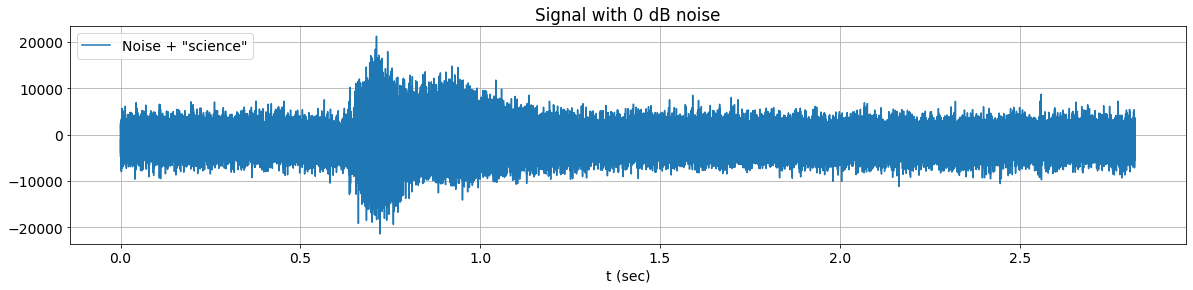

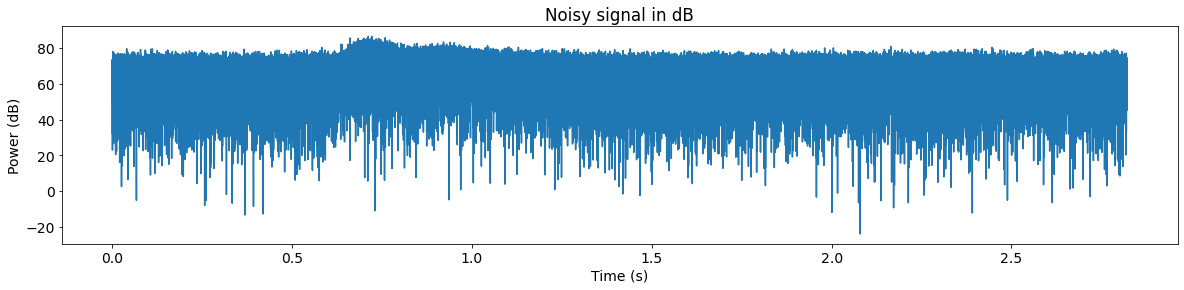

noisy sound


In [ ]:
# ADDING 0 dB NOISE: 

snr_db = 0
sig_pwr=np.array(aud,dtype='int64')**2
sig_avg_watts=np.mean(sig_pwr)   # calculate signal power 


sig_avg_db = 10 * np.log10(sig_avg_watts)   # signal power to dB

noise_avg_db = sig_avg_db - snr_db     # SNR =  signal dB -  noise dB
noise_avg_watts = 10 ** (noise_avg_db / 10)   # calculate average noise energy = noise variance

# defining the noise signal
mean_noise = 0  # zero mean gaussian noise 

noise = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), N)
noise=np.reshape(noise,(90267,1))
noisy=noise+aud  # noisy signal = audio + noise
noisy_2=noisy

# Plot signal with noise
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,noisy, label='Noise + "science"')
plt.xlabel('t (sec)')
plt.grid()
plt.title('Signal with 0 dB noise')
plt.legend(loc='upper left')
plt.show()

# Plot in dB

y_watts = noisy ** 2
y_db = 10 * np.log10(y_watts)
plt.figure(figsize=(20,4))

plt.plot(t, y_db)
plt.title('Noisy signal in dB')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()
print('noisy sound')
wavio.write("/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_0.wav", noisy, fs, sampwidth=3)
ipd.Audio('/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_0.wav') # load a local WAV file


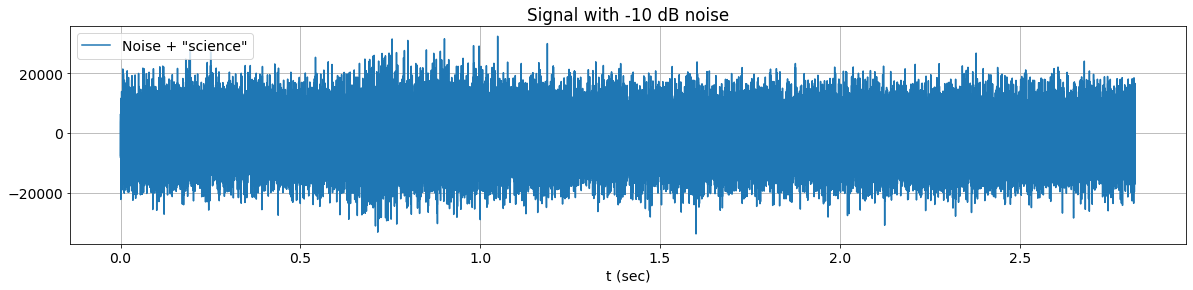

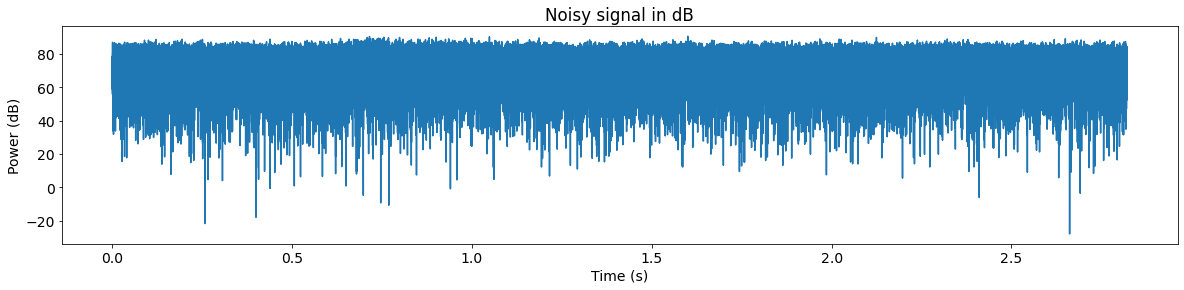

noisy sound


In [ ]:
# ADDING -10 dB NOISE: 

snr_db = -10
sig_pwr=np.array(aud,dtype='int64')**2
sig_avg_watts=np.mean(sig_pwr)   # calculate signal power 


sig_avg_db = 10 * np.log10(sig_avg_watts)   # signal power to dB

noise_avg_db = sig_avg_db - snr_db     # SNR =  signal dB -  noise dB
noise_avg_watts = 10 ** (noise_avg_db / 10)   # calculate average noise energy = noise variance

# defining the noise signal
mean_noise = 0  # zero mean gaussian noise 

noise = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), N)
noise=np.reshape(noise,(90267,1))
noisy=noise+aud  # noisy signal = audio + noise
noisy_3=noisy

# Plot signal with noise
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,noisy, label='Noise + "science"')
plt.xlabel('t (sec)')
plt.grid()
plt.title('Signal with -10 dB noise')
plt.legend(loc='upper left')
plt.show()

# Plot in dB

y_watts = noisy ** 2
y_db = 10 * np.log10(y_watts)
plt.figure(figsize=(20,4))

plt.plot(t, y_db)
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.title('Noisy signal in dB')
plt.show()
print('noisy sound')
wavio.write("/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_-10.wav", noisy, fs, sampwidth=3)
ipd.Audio('/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_-10.wav') # load a local WAV file


**(b) Perform Weiner filtering to eliminate the noise from the corrupted speech
signals. Evaluate the SNR value for the filtered speech signals.**

In [ ]:
def dbpower(x):
  x=np.array(x)
  x_power=np.mean(np.array(x,dtype='int64')**2)
  return 10*np.log10(x_power)

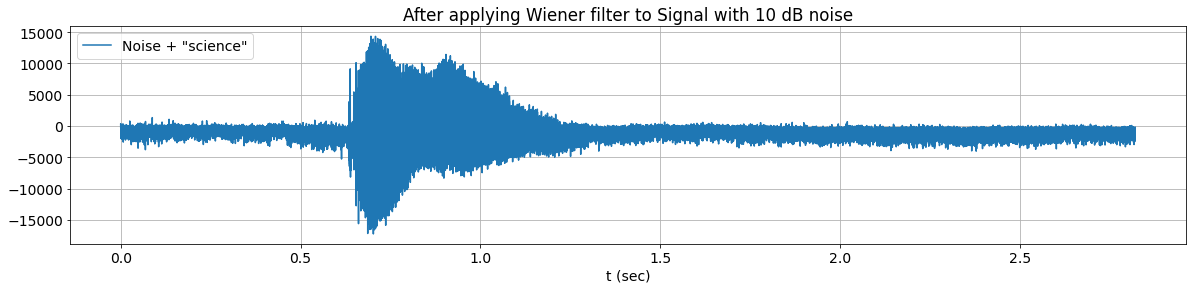

Signal to Noise ratio after filtering = 10.068072168533341 dB


In [ ]:
from scipy import signal

filtered=signal.wiener(noisy_1,mysize=2,noise=10**(dbpower(noisy_1-aud)/10))
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,filtered, label='Noise + "science"')
plt.xlabel('t (sec)')
plt.grid()
plt.title('After applying Wiener filter to Signal with 10 dB noise')
plt.legend(loc='upper left')
plt.show()

snr_db=dbpower(aud)-dbpower(filtered-aud)
print(f'Signal to Noise ratio after filtering = {snr_db} dB')

wavio.write("/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_+1_filtered.wav", filtered, fs, sampwidth=3)
ipd.Audio('/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_+1_filtered.wav') # load a local WAV file



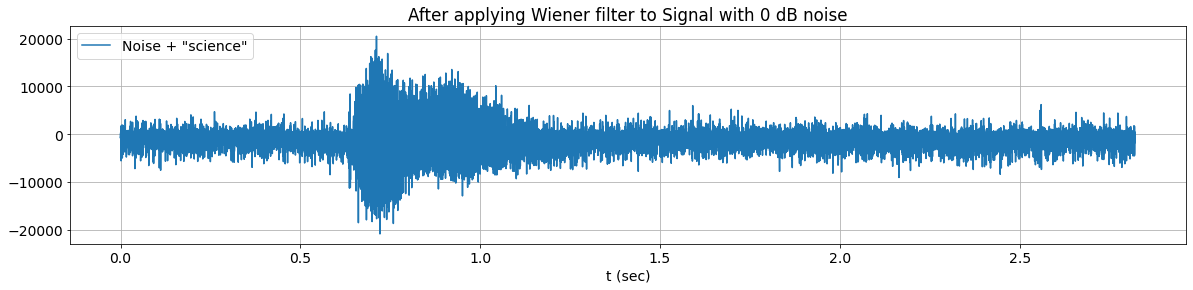

Signal to Noise ratio after filtering = 4.382137605010229 dB


In [ ]:


filtered=signal.wiener(noisy_2)
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,filtered, label='Noise + "science"')
plt.xlabel('t (sec)')
plt.grid()
plt.title('After applying Wiener filter to Signal with 0 dB noise')
plt.legend(loc='upper left')
plt.show()

snr_db=dbpower(aud)-dbpower(filtered-aud)
print(f'Signal to Noise ratio after filtering = {snr_db} dB')

wavio.write("/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_0_filtered.wav", filtered, fs, sampwidth=4)
ipd.Audio('/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_0_filtered.wav') # load a local WAV file


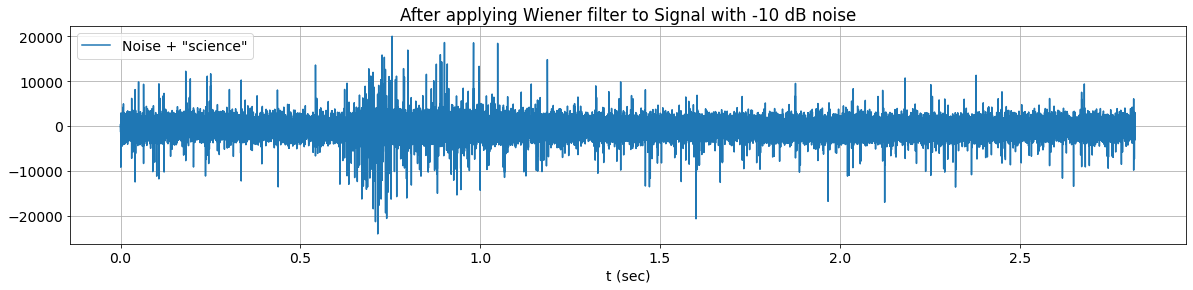

Signal to Noise ratio after filtering = 0.6314623673736435 dB


In [ ]:

filtered=signal.wiener(noisy_3,noise=10**(dbpower(noisy_3-aud)/10))
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,filtered, label='Noise + "science"')
plt.xlabel('t (sec)')
plt.grid()
plt.title('After applying Wiener filter to Signal with -10 dB noise')
plt.legend(loc='upper left')
plt.show()

snr_db=dbpower(aud)-dbpower(filtered-aud)
print(f'Signal to Noise ratio after filtering = {snr_db} dB')

wavio.write("/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_-1_filtered.wav", filtered, fs, sampwidth=3)
ipd.Audio('/content/drive/MyDrive/IIT Guwahati/Biomedical_SP_(IIT Guwahati)/Assignment_2/science_-1_filtered.wav') # load a local WAV file